** Временной ряд **

Что такое временной ряд? Временным рядом называется последовательность значений признака y, измеряемого через постоянные временные интервалы. Пример временного ряда: y1, y2, y3, ... yn или:

In [2]:
series = [3, 10, 12, 13, 12, 10, 12]

In [3]:
import matplotlib.pyplot as plt

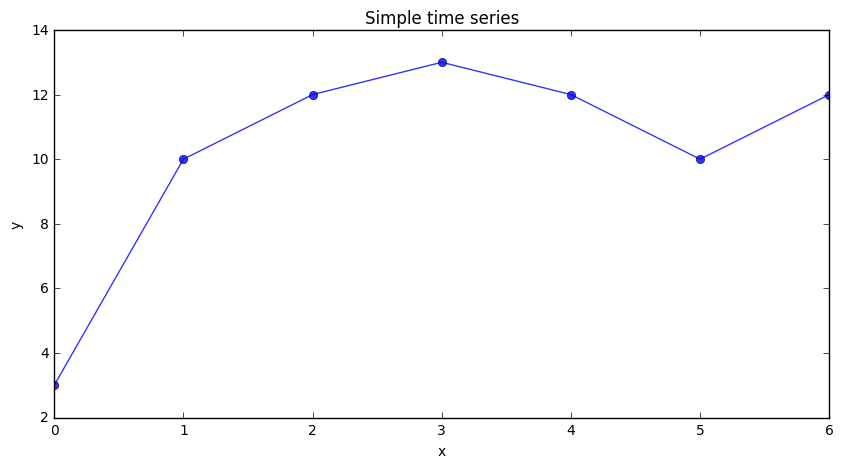

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')

# Show result on screen
plt.show()

"The main subject here is a series. In the real world we are most likely to be applying this to a time series, but for this discussion the time aspect is irrelevant. A series is merely an ordered sequence of numbers. We might be using words that are chronological in nature (past, future, yet, already, time even!), but only because it makes it easer to understand. So **forget about time, timestamps, intervals, time does not exist, the only property each data point has (other than the value) is its order: first, next, previous, last, etc.**

It is useful to think of a series as a list of two-dimensional x,y
coordinates, where x is order (always going up by 1), and y is value. For this reason in our math formulas we will be sticking to y for value and x for order."

Примеры временных рядов — это ряды среднедневных цен на акции определённой компании, среднемесячного уровня безработицы, измеренного в течение нескольких лет, среднегодового уровня производства автомобилей и т.п.

** С практической точки зрения интересна задача предсказания временного ряда **

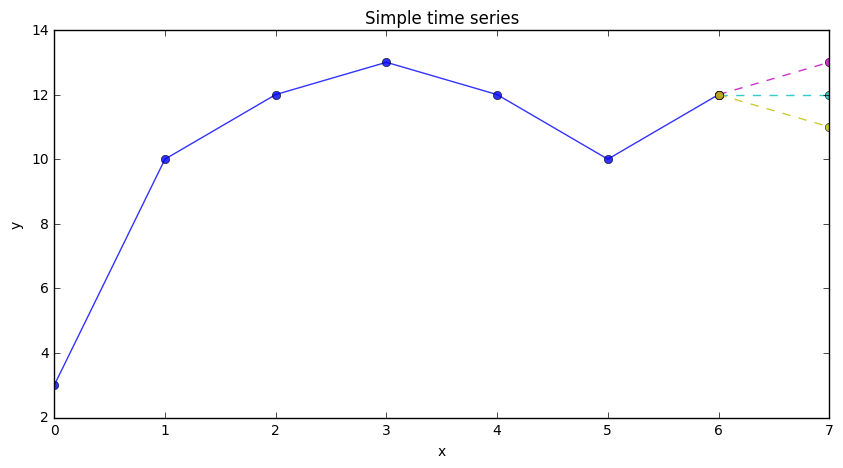

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
plt.plot([len(series) - 1, len(series)], [series[-1], series[-1]], 'o--c', alpha=0.8)
plt.plot([len(series) - 1, len(series)], [series[-1], series[-1] + 1], 'o--m', alpha=0.8)
plt.plot([len(series) - 1, len(series)], [series[-1], series[-1] - 1], 'o--y', alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')

# Show result on screen
plt.show()

Как измерять ошибку? Sum of Squared Errors (SSE) или Mean Squared Error (MSE) подойдет.

**Методы предсказания временного ряда**

Наивный метод: y(x+1) = y(x)

In [6]:
def naive(series):
    return series[-1]

In [7]:
naive(series)

12

Простое среднее: y(x+1) = mean(series)

In [8]:
import numpy as np

In [9]:
def average(series):
    return np.mean(series)

In [10]:
average(series)

10.285714285714286

Скользящее среднее: y(x+1) = mean(series[-n])

In [11]:
# moving average using n last points
def moving_average(series, n):
    return average(series[-n:])

In [12]:
moving_average(series, 3)

11.333333333333334

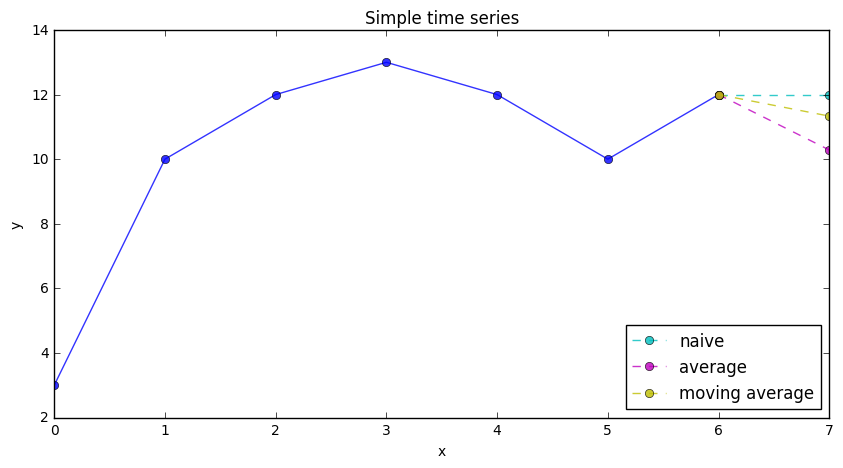

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
plt.plot([len(series) - 1, len(series)], [series[-1], naive(series)], 'o--c', alpha=0.8, label='naive')
plt.plot([len(series) - 1, len(series)], [series[-1], average(series)], 'o--m', alpha=0.8, label='average')
plt.plot([len(series) - 1, len(series)], [series[-1], moving_average(series, 3)], 'o--y', alpha=0.8, label='moving average')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='lower right', numpoints=1)

# Show result on screen
plt.show()

Взвешенное скользящее среднее

In [14]:
# weighted average, weights is a list of weights
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

In [15]:
weights = [0.1, 0.2, 0.3, 0.4]
weighted_average(series, weights)

11.500000000000002

Сумма весов, очевидно, должна быть равна 1: 

In [16]:
weighted_average(series, [0.9, 0.8, 0.7, 0.6])

35.5

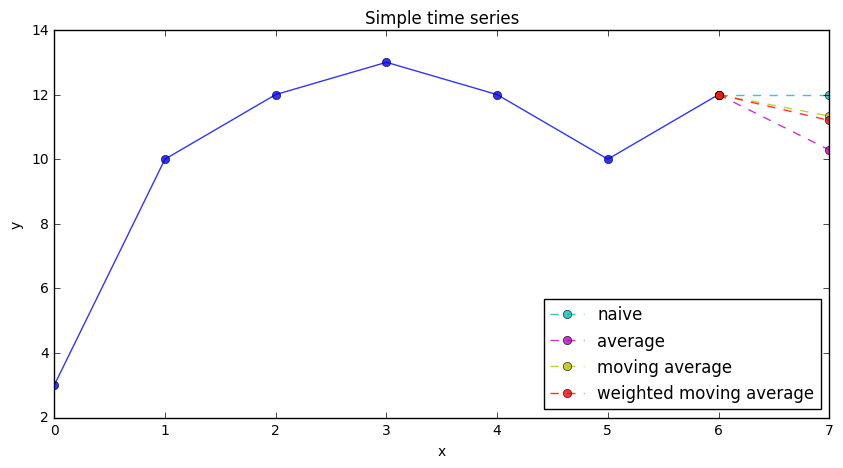

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
plt.plot([len(series) - 1, len(series)], [series[-1], naive(series)], 'o--c', alpha=0.8, label='naive')
plt.plot([len(series) - 1, len(series)], [series[-1], average(series)], 'o--m', alpha=0.8, label='average')
plt.plot([len(series) - 1, len(series)], [series[-1], moving_average(series, 3)], 'o--y', alpha=0.8, label='moving average')
plt.plot([len(series) - 1, len(series)], [series[-1], weighted_average(series, [0.1, 0.4, 0.5])], 'o--r', alpha=0.8, label='weighted moving average')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='lower right', numpoints=1)

# Show result on screen
plt.show()

Какой метод лучше - зависит от *скрытой* природы временного ряда. Проверять по SSE/MSE и т.п. Более сложный метод необзательно лучший.

Дальнейшее усложнение идеи взвешенного усреднения - экспоненциальное сглаживание.  
Будем использовать все точки ряда, а веса зададим например такие [0.9^1, 0.9^2, 0.9^3, ...]

In [18]:
[0.9**1, 0.9**2, 0.9**3, 0.9**4, 0.9**5, 0.9**6]

[0.9, 0.81, 0.7290000000000001, 0.6561, 0.5904900000000001, 0.531441]

Интересным является тот факт, что экспоненциальное сглаживание можно представить в виде рекуррентной формулы:  


y_pred(x) = alpha \* y_true(x) + (1-alpha) \* y_pred(x-1), где  


y_pred(x) - искомое *сглаженное* значение в (момент) x,  
y_true(x-1) - известное настоящее значение в (момент) x-1,  
y_pred(x-1) - известное ранее рассчитанное *сглаженное* значение в момент (x-1),  
alpha - коэффициент сглаживания, о котором можно думать как о некотором основании экспоненциального ряда весов (0.9 в примере выше).


Aplha также можно назвать коэффициентом "забывания". Чем больше alpha - тем больший вес имеют ближайшие отсчеты, метод быстрее "забывает" дальние отсчеты.

In [19]:
# given a series and alpha, return series of smoothed points + one predicted
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    # predicted point:
    result.append(alpha * series[n] + (1 - alpha) * result[n])
    return result

In [20]:
#series = [3, 10, 12, 13, 12, 10, 12]
series = [3, 10, 12, 13, 12, 10, 12]

In [21]:
1/(series[5]/exponential_smoothing(series, 0.1)[5])

0.643537

In [22]:
exponential_smoothing(series, 0.9)

[3, 9.3, 11.73, 12.873000000000001, 12.0873, 10.20873, 11.820873, 11.9820873]

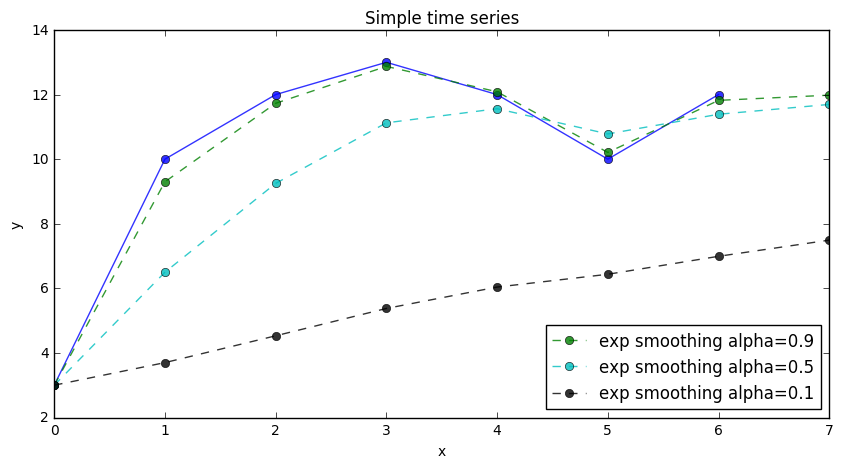

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
#plt.plot([len(series) - 1, len(series)], [series[-1], naive(series)], 'o--c', alpha=0.8, label='naive')
#plt.plot([len(series) - 1, len(series)], [series[-1], average(series)], 'o--m', alpha=0.8, label='average')
#plt.plot([len(series) - 1, len(series)], [series[-1], moving_average(series, 3)], 'o--y', alpha=0.8, label='moving average')
#plt.plot([len(series) - 1, len(series)], [series[-1], weighted_average(series, [0.1, 0.4, 0.5])], 'o--r', alpha=0.8, label='weighted moving average')
plt.plot(exponential_smoothing(series, 0.9), 'o--g', alpha=0.8, label='exp smoothing alpha=0.9')
plt.plot(exponential_smoothing(series, 0.5), 'o--c', alpha=0.8, label='exp smoothing alpha=0.5')
plt.plot(exponential_smoothing(series, 0.1), 'o--k', alpha=0.8, label='exp smoothing alpha=0.1')


plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='lower right', numpoints=1)

# Show result on screen
plt.show()

Дальнейшее усложнение - двойное экспоненциальное сглаживание.

Теперь ожидамое (предсказываемое) значение назовем уровнем (level) - для усложнения терминологии :)  
Вспомним угловой коэффициент наклона прямой из школы: m = delta(y)/delta(x).  
delta(x) между двумя отсчетами всегда равен 1, так что m = y(x) - y(x-1). Назовем это b или "тренд". Тренд может быть аддитивным (как у нас), а может быть выражен отношением y(x) и y(x-1) - мультипликативный тренд. Для простоты будем рассматривать пока аддитивный.

Теперь у нас есть 2 компоненты для того, чтобы представить предсказываемое значение - уровень и тренд. Выше мы предсказывали только уровень, теперь можем попробовать использовать те же методы предсказания для тренда. Пропустим наивный, средний и т.д. методы, оставим только метод экпоненциального сглаживания.

In [24]:
# given a series and alpha, return series of smoothed points
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result


In [25]:
double_exponential_smoothing(series, alpha=0.9, beta=0.9)

[3,
 17.0,
 15.45,
 14.210500000000001,
 11.396044999999999,
 8.183803049999998,
 12.753698384500002,
 13.889016464000003]

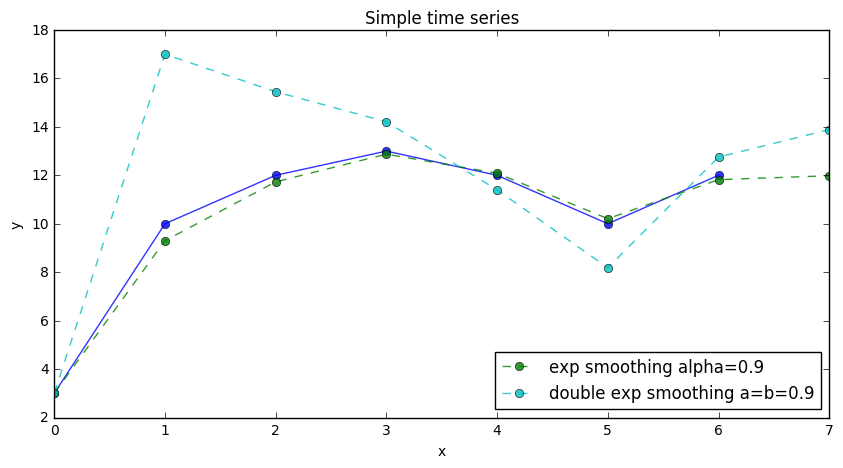

In [26]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
#plt.plot([len(series) - 1, len(series)], [series[-1], naive(series)], 'o--c', alpha=0.8, label='naive')
#plt.plot([len(series) - 1, len(series)], [series[-1], average(series)], 'o--m', alpha=0.8, label='average')
#plt.plot([len(series) - 1, len(series)], [series[-1], moving_average(series, 3)], 'o--y', alpha=0.8, label='moving average')
#plt.plot([len(series) - 1, len(series)], [series[-1], weighted_average(series, [0.1, 0.4, 0.5])], 'o--r', alpha=0.8, label='weighted moving average')
plt.plot(exponential_smoothing(series, 0.9), 'o--g', alpha=0.8, label='exp smoothing alpha=0.9')
plt.plot(double_exponential_smoothing(series, 0.9, 0.9), 'o--c', alpha=0.8, label='double exp smoothing a=b=0.9')


plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='lower right', numpoints=1)

# Show result on screen
plt.show()

Теперь добавим следующее требование к временному ряду: пусть он будет сезонным, т.е. некоторые элементы его формы повторяются с некоторым интервалом. Для таких рядов можно использовать следующий метод - тройное экспоненциальное сглаживание. Holt-Winters method.

Период сезона, L - расстояние между отсчетами, когда форма сигнала начинает повторять форму наблюдаемую L отсчетов назад.  
Сезонная компонента - дополнительное отклонение от level + trend для каждой точки обозначим s.

<img src="triple_exp.png">

γ - коэффициент сглаживания для сезонной компоненты.  

Индекс x+m у предсказываемого значения означает что мы можем использовать формулу для получения предсказания на m отсчетов вперед.  

При этом сложный индекс x-L+1+(m-1)modL обозначает тот факт, что для предсказания нужно использовать сезонные компоненты только в наблюдаемых, известных точках, расположенных "в прошлом".

In [27]:
# Теперь нам понадобиться ряд с сезонностью:
series = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]

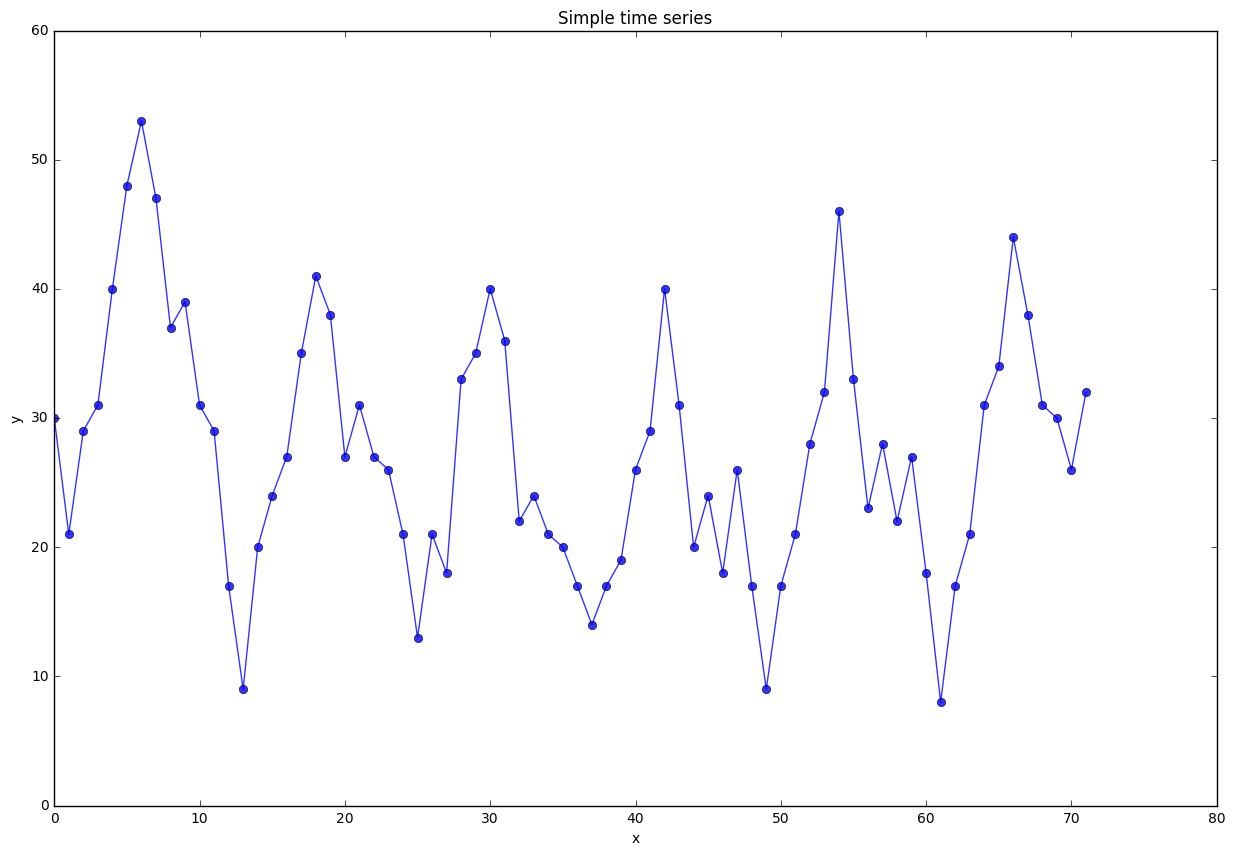

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')

# Show result on screen
plt.show()

Легко заметить что форма временного ряда повторяется на обозреваемом интервале 6 раз - каждые 12 отсчетов.

В двойном экспоненциальном сглаживании у нас была проблема с начальным значением тренда, для которого мы использовали 2 первые точки.
В случае наличия явления сезонности (как у нас теперь) во временном ряде, мы можем использовать первые 2 точки в каждом наблюдаемом сезоне. Такое начальное значение может быть лучше.

<img src="initial_trend.png">

In [29]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

Начальные значения для сезонных компонент считаются методом немного сложнее.
Вкраце: нужно посчитать средний уровень для каждого наблюдаемого сезона, 
    поделить значение каждого отсчет на средний по своему сезону, и усреднить полученные значения по наблюдаемым сезонам.
http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc435.htm

In [30]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

Итак, метод тройного экспоненциального сглаживания по формулам выше:

In [31]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [32]:
tes = triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)
print np.array(np.round(tes), dtype='int')
print np.array(series)

[30 20 28 30 39 48 53 47 37 39 31 28 16  8 19 23 26 34 40 37 26 31 27 26 21
 13 21 17 33 35 40 36 22 23 21 20 17 14 17 19 26 29 40 31 20 24 18 26 17  9
 17 21 28 32 46 33 23 28 22 27 18  8 17 21 31 34 44 38 31 30 26 32 22 15 24
 27 35 39 49 41 31 33 29 32 23 16 24 27 36 39 50 41 32 33 29 33]
[30 21 29 31 40 48 53 47 37 39 31 29 17  9 20 24 27 35 41 38 27 31 27 26 21
 13 21 18 33 35 40 36 22 24 21 20 17 14 17 19 26 29 40 31 20 24 18 26 17  9
 17 21 28 32 46 33 23 28 22 27 18  8 17 21 31 34 44 38 31 30 26 32]


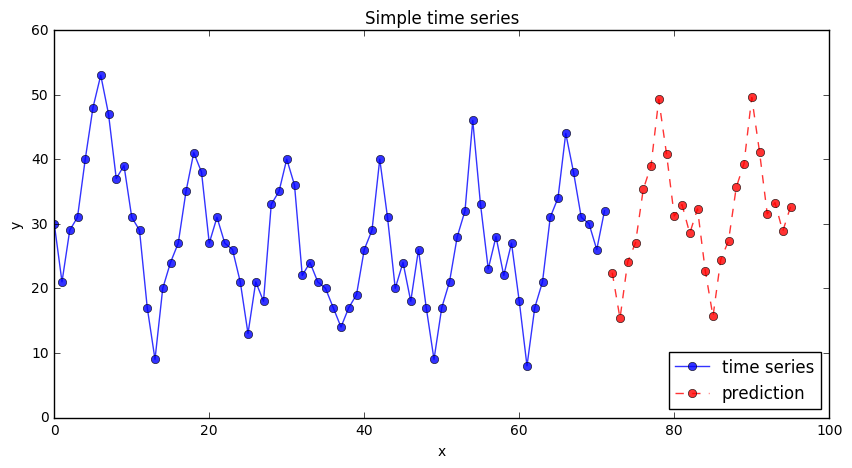

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('Simple time series')
plt.plot(series, 'o-b', alpha=0.8, label='time series')
plt.plot(range(len(tes)-24, len(tes)), tes[-24:], 'o--r', alpha=0.8, label='prediction')


plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='lower right', numpoints=1)

# Show result on screen
plt.show()

In [34]:
import statsmodels.api as sm

In [65]:
decomposition = sm.tsa.seasonal_decompose(series, freq=12)

In [66]:
# a hack to increase image size
plt.rcParams['figure.figsize'] = (10, 10)

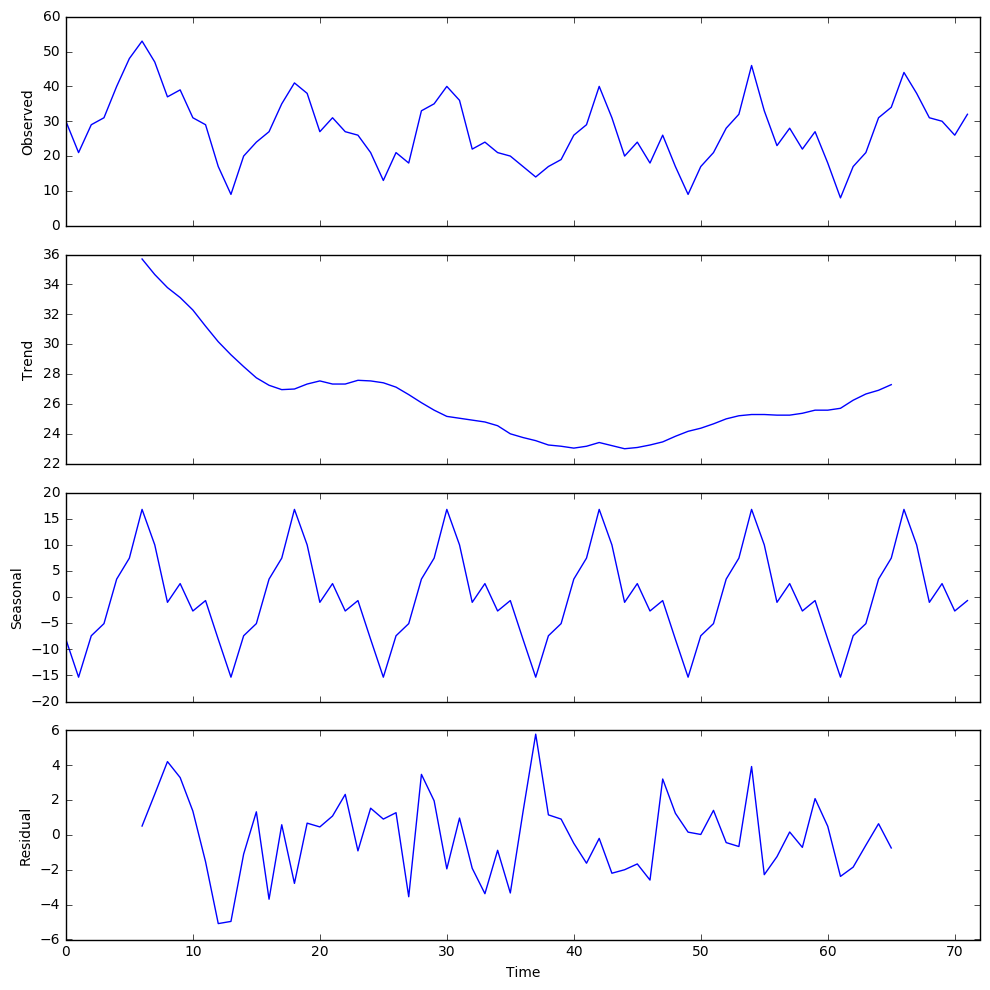

In [67]:
decomposition.plot()

In [52]:
# http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [53]:
from statsmodels.tsa.filters.api import convolution_filter

In [54]:
# https://ru.wikipedia.org/wiki/Свёртка_(математический_анализ)

In [55]:
freq = 12
two_sided = True
filt = None

if filt is None:
    if freq % 2 == 0:  # split weights at ends
        filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
    else:
        filt = np.repeat(1./freq, freq)

nsides = int(two_sided) + 1
trend = convolution_filter(series, filt, nsides)

In [56]:
print filt
print np.sum(filt)

[ 0.04166667  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
  0.04166667]
1.0


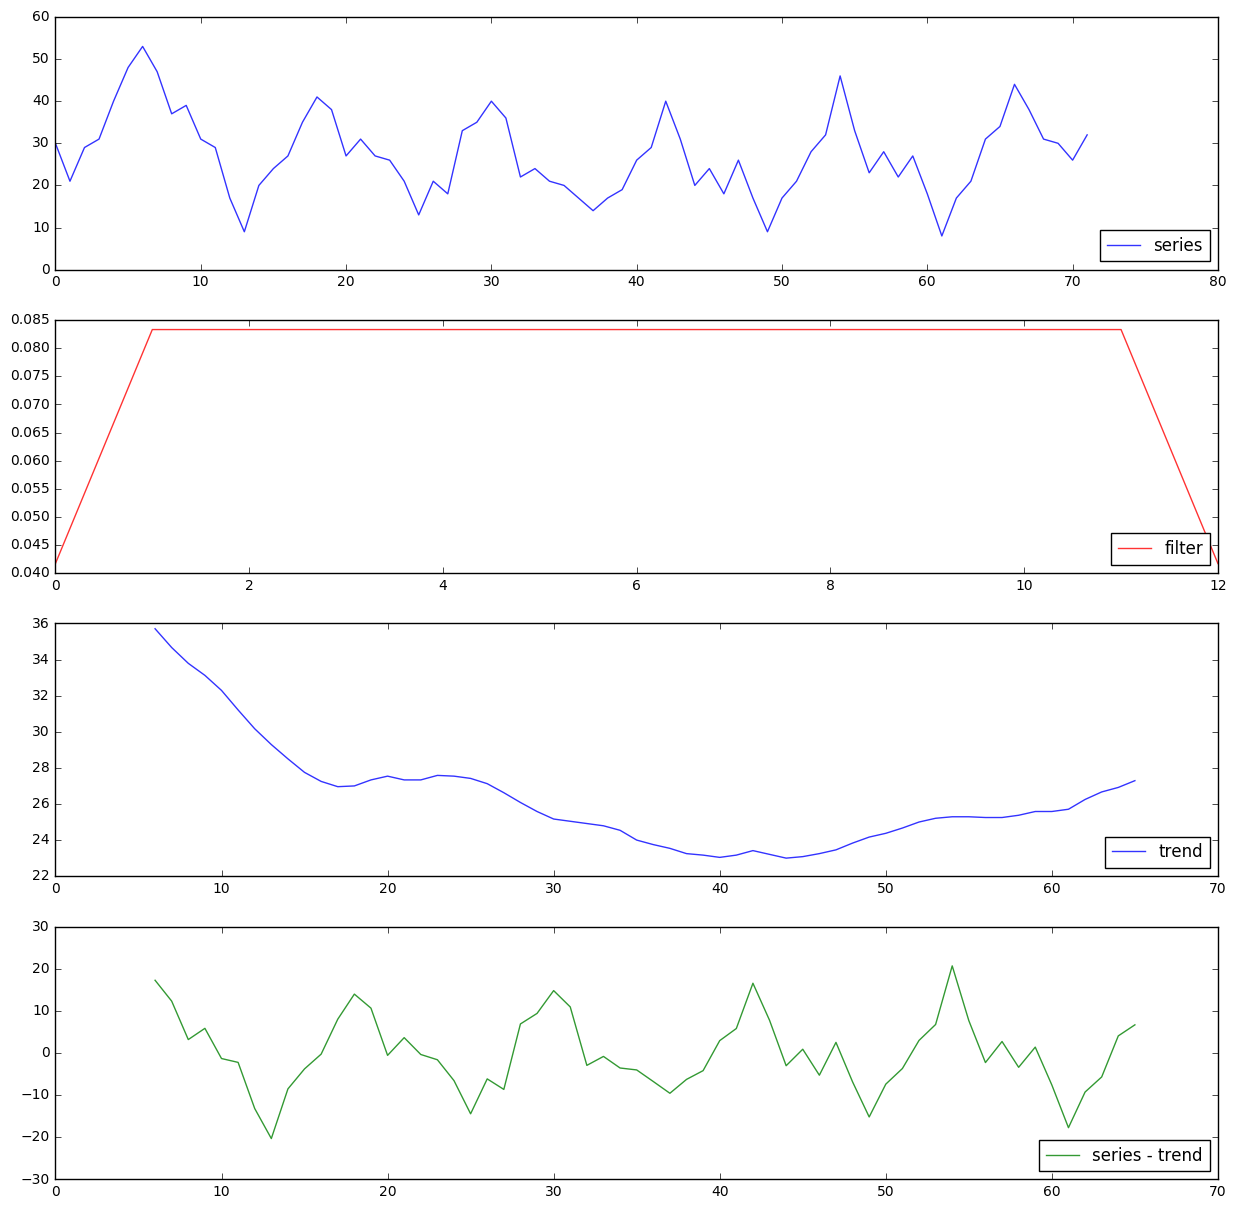

In [58]:
plt.figure(figsize=(15,15))

plt.axes

plt.subplot(4,1,1)
plt.plot(series, 'b', alpha=0.8, label='series')
plt.legend(loc='lower right', numpoints=1)

plt.subplot(4,1,2)
plt.plot(filt, 'r', alpha=0.8, label='filter')
plt.legend(loc='lower right', numpoints=1)

plt.subplot(4,1,3)
plt.plot(trend, 'b', alpha=0.8, label='trend')
plt.legend(loc='lower right', numpoints=1)

plt.subplot(4,1,4)
plt.plot(series - trend, 'g', alpha=0.8, label='series - trend')
plt.legend(loc='lower right', numpoints=1)

# Show result on screen
plt.show()

In [89]:
weighted_average(series, list(filt))

27.291666666666664

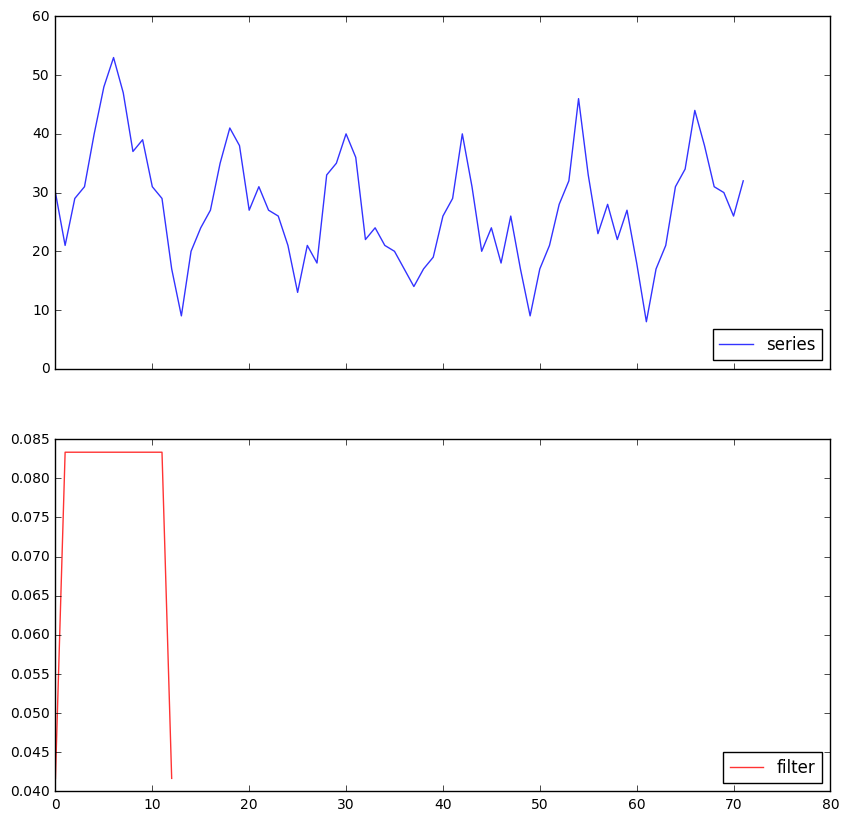

In [97]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(series, 'b', alpha=0.8, label='series')
axarr[0].legend(loc='lower right', numpoints=1)
axarr[1].plot(filt, 'r', alpha=0.8, label='filter')
axarr[1].legend(loc='lower right', numpoints=1)
plt.show()

In [98]:
?plt.subplot